In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**TEXT** **PREPOCESSING**

In [3]:
DOCUMENT=""
for i in range(1,4):
  file_name=f"{i}.txt"
  DOCUMENT+=(open(file_name).read())
print(DOCUMENT)

 A visible improvement in Delhi's air quality was recorded on Sunday although it was in the ''very poor'' category while the city's Environment Minister Gopal Rai said his government will submit a lockdown proposal to the Supreme Court on Monday to reduce pollution further.
The national capital recorded a 24-hour average air quality index (AQI) of 330 on Sunday as against 437 the previous day as emissions from farm fires in Haryana and Punjab dropped significantly. The AQI was and 471 on Friday, the worst this season so far.

The air quality index of neighbouring Ghaziabad, Gurgaon, Noida, Faridabad, Greater Noida was recorded at 331, 287, 321, 298 and 310, respectively.

An AQI between zero and 50 is considered ''good'', 51 and 100 ''satisfactory'', 101 and 200 ''moderate'', 201 and 300 ''poor'', 301 and 400 ''very poor'', and 401 and 500 ''severe''.

The India Meteorological Department said visibility levels ranged from 1,500 to 2,200 metres at the Indira Gandhi International Airport

In [4]:
import re
DOCUMENT = re.sub(r'\n|\r', ' ', DOCUMENT)
DOCUMENT = DOCUMENT.strip()

print(DOCUMENT)

A visible improvement in Delhi's air quality was recorded on Sunday although it was in the ''very poor'' category while the city's Environment Minister Gopal Rai said his government will submit a lockdown proposal to the Supreme Court on Monday to reduce pollution further. The national capital recorded a 24-hour average air quality index (AQI) of 330 on Sunday as against 437 the previous day as emissions from farm fires in Haryana and Punjab dropped significantly. The AQI was and 471 on Friday, the worst this season so far.  The air quality index of neighbouring Ghaziabad, Gurgaon, Noida, Faridabad, Greater Noida was recorded at 331, 287, 321, 298 and 310, respectively.  An AQI between zero and 50 is considered ''good'', 51 and 100 ''satisfactory'', 101 and 200 ''moderate'', 201 and 300 ''poor'', 301 and 400 ''very poor'', and 401 and 500 ''severe''.  The India Meteorological Department said visibility levels ranged from 1,500 to 2,200 metres at the Indira Gandhi International Airport 

**SENTENCING**

In [6]:
sentences=nltk.sent_tokenize(DOCUMENT)
print(sentences)
len(sentences)

["A visible improvement in Delhi's air quality was recorded on Sunday although it was in the ''very poor'' category while the city's Environment Minister Gopal Rai said his government will submit a lockdown proposal to the Supreme Court on Monday to reduce pollution further.", 'The national capital recorded a 24-hour average air quality index (AQI) of 330 on Sunday as against 437 the previous day as emissions from farm fires in Haryana and Punjab dropped significantly.', 'The AQI was and 471 on Friday, the worst this season so far.', 'The air quality index of neighbouring Ghaziabad, Gurgaon, Noida, Faridabad, Greater Noida was recorded at 331, 287, 321, 298 and 310, respectively.', "An AQI between zero and 50 is considered ''good'', 51 and 100 ''satisfactory'', 101 and 200 ''moderate'', 201 and 300 ''poor'', 301 and 400 ''very poor'', and 401 and 500 ''severe''.", 'The India Meteorological Department said visibility levels ranged from 1,500 to 2,200 metres at the Indira Gandhi Internat

25

In [7]:
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    #remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    #make into lowercase
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc
#making into numpy array for further processing
normalize_corpus = np.vectorize(normalize_document)

norm_sentences = normalize_corpus(sentences)
norm_sentences[:4]

array(['visible improvement delhis air quality recorded sunday although poor category citys environment minister gopal rai said government submit lockdown proposal supreme court monday reduce pollution',
       'national capital recorded hour average air quality index aqi sunday previous day emissions farm fires haryana punjab dropped significantly',
       'aqi friday worst season far',
       'air quality index neighbouring ghaziabad gurgaon noida faridabad greater noida recorded respectively'],
      dtype='<U359')

**Vectorizing**

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
dt_matrix = tv.fit_transform(norm_sentences)
dt_matrix = dt_matrix.toarray()

vocab = tv.get_feature_names()
td_matrix = dt_matrix.T
print(td_matrix.shape)
pd.DataFrame(np.round(td_matrix, 2), index=vocab)


(297, 25)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
able,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.25,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
admitted,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.29,0.0,0.0,0.0,0.0,0.0,0.0
adopted,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.26,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
aid,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.24,0.00,0.0,0.0,0.0,0.0,0.0,0.0
ailments,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.24,0.00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xis,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.32,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
year,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.28,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
years,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.32,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
zedong,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.23,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0


**BUILDING SIMILARITY MATRIX**

In [9]:
similarity_matrix = np.matmul(dt_matrix, dt_matrix.T)
print(similarity_matrix.shape)
np.round(similarity_matrix, 3)

(25, 25)


array([[1.   , 0.152, 0.   , 0.125, 0.113, 0.029, 0.557, 0.183, 0.043,
        0.   , 0.035, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.152, 1.   , 0.074, 0.192, 0.051, 0.   , 0.   , 0.105, 0.056,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.074, 1.   , 0.   , 0.096, 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.125, 0.192, 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.052, 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.047, 0.   , 0.   , 0.   , 0.   ],
       [0.113, 0.051, 0.096, 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],


**SEMANTIC** **GRAPH** **CONSTRUCTION**

In [10]:
import networkx

similarity_graph = networkx.from_numpy_array(similarity_matrix)
similarity_graph

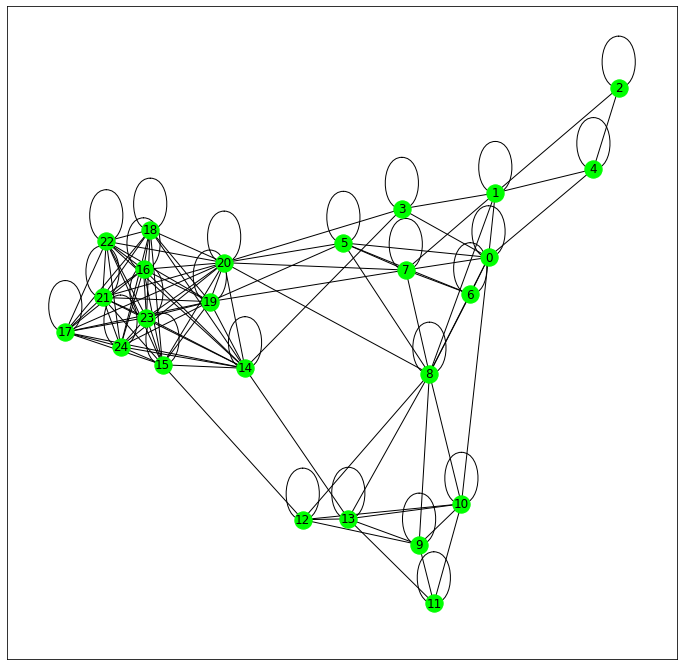

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,12))
networkx.draw_networkx(similarity_graph, node_color='lime')

**GETTING** **SENTENCE** **IMPORTANT** **SCORES**

In [12]:
scores = networkx.pagerank(similarity_graph)
ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
ranked_sentences[:20]

[(0.05094578251125085, 23),
 (0.050900845134889634, 0),
 (0.043580471810056434, 6),
 (0.04269699685279467, 16),
 (0.04260678150553241, 20),
 (0.042527541930082534, 18),
 (0.04162906733430659, 15),
 (0.04114402722540945, 24),
 (0.04112474692403288, 10),
 (0.04103534753917604, 1),
 (0.040558319467001336, 7),
 (0.03984092587850705, 19),
 (0.03964281911991289, 22),
 (0.039084043438304156, 9),
 (0.038540659135477384, 11),
 (0.03829541229344317, 8),
 (0.03812770097996277, 13),
 (0.03759480882574738, 21),
 (0.03728044524253565, 14),
 (0.03631889674420968, 2)]

**Summary** **Generation**

In [13]:
num_sentences=7;
top_sentence_indices = [ranked_sentences[index][1] 
                        for index in range(num_sentences)]
top_sentence_indices.sort()

In [14]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

A visible improvement in Delhi's air quality was recorded on Sunday although it was in the ''very poor'' category while the city's Environment Minister Gopal Rai said his government will submit a lockdown proposal to the Supreme Court on Monday to reduce pollution further.
Delhi Environment Minister Gopal Rai said the city government will on Monday submit to the Supreme Court a proposal on clamping a lockdown and its modalities.
Health experts have raised concerns over the growing cases of vitamin D deficiency in general population as people are staying at home and are not able to obtain the 'sunshine vitamin' from natural sunlight.
In fact, a new study discovered over 80% COVID-19 patients suffering from vitamin D deficiency.
The study that was published in 'The Journal of Clinical Endocrinology & Metabolism', found 80 percent of 216 COVID-19 patients admitted in a hospital in Spain to be vitamin D-deficient.
"Vitamin D-deficient COVID-19 patients had a greater prevalence of hypertens